<h1 align='center'> Flight Price Prediction
   
------
    
![flight](https://cdn.analyticsvidhya.com/wp-content/uploads/2021/04/25317plane.jpg)

## Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

## Training Data

---

### Data Gathering


- Since data is in form of excel file we have to use pandas read_excel to load the data
- After loading data it is important to check the complete information of data 

In [2]:
#"/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx"
train_data = pd.read_excel("Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Data Cleaning

- Check whether any null values are there or not. 
- If it is present then following can be done,
    1. Imputing data using Imputation method in sklearn
    2. Filling NaN values with mean, median and mode using fillna() method
- Describe data --> which can give statistical analysis

In [6]:
# check if count of null values which are present
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# there is only 2 null values so we drop this values
train_data.dropna(inplace=True)

In [8]:
# recheck after handling null values 
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

#### - Date Columns 

In [9]:
# Date_of_Journey column is of object type first convert it into datetime 
# then create day and month column and detele Date_of_Journey column
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

train_data.drop(['Date_of_Journey'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


- #### 'Route','Total_Stops','Additional_Info' columns

In [10]:
train_data[['Route','Total_Stops','Additional_Info']]

,Route,Total_Stops,Additional_Info
0,BLR → DEL,non-stop,No info
1,CCU → IXR → BBI → BLR,2 stops,No info
2,DEL → LKO → BOM → COK,2 stops,No info
3,CCU → NAG → BLR,1 stop,No info
4,BLR → NAG → DEL,1 stop,No info
...,...,...,...
10678,CCU → BLR,non-stop,No info
10679,CCU → BLR,non-stop,No info
10680,BLR → DEL,non-stop,No info
10681,BLR → DEL,non-stop,No info


In [11]:
# we can see that Route and Total_Stops are releated to each other so we use Total_Stops
# Additional_info does not conten required data/ there is no info so we drop it
train_data.drop(['Route','Additional_Info'],axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


#### - Time Columns

In [12]:
train_data[['Dep_Time','Arrival_Time','Duration']].head()

,Dep_Time,Arrival_Time,Duration
0,22:20,01:10 22 Mar,2h 50m
1,05:50,13:15,7h 25m
2,09:25,04:25 10 Jun,19h
3,18:05,23:30,5h 25m
4,16:50,21:35,4h 45m


In [13]:
# Create new columns for min and hour

# for Dep_Time

train_data['Dep_Hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_Min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

# for Arrival_Time
train_data['Arrival_Hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_Min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

#drop 'Arrival_Time','Dep_Time'
train_data.drop(['Arrival_Time','Dep_Time'],axis=1,inplace=True)

train_data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [14]:
'0h 19m'.split('m')[0].split()[-1]

'19'

In [15]:
# train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
# train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

# train_data['Dep_Hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour
# train_data['Dep_Min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

# # for Arrival_Time
# train_data['Arrival_Hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
# train_data['Arrival_Min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute


duration = list(train_data.Duration)
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h '+ duration[i]


# Extract hour and minute and create new column
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
train_data["duration_hours"] = duration_hours
train_data["duration_mins"] = duration_mins

train_data.drop('Duration',axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


#### - Work on Categorical Data

In [16]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

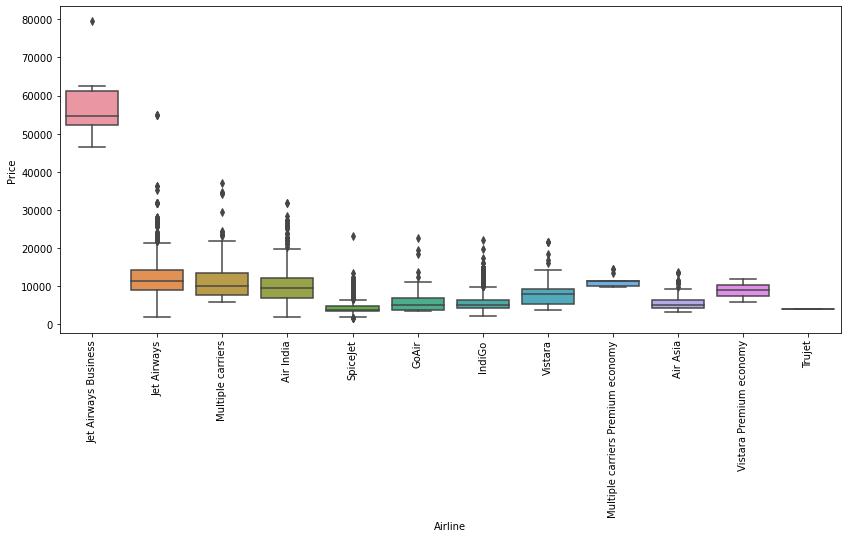

In [17]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.boxplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False))


In [18]:
Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='Source', ylabel='Price'>

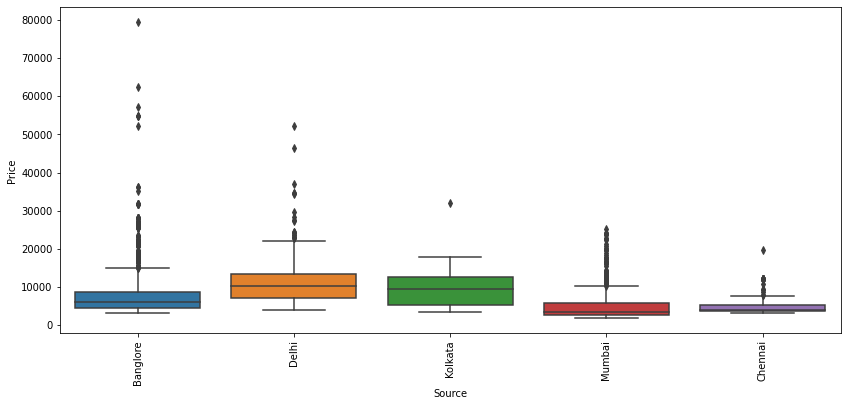

In [19]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.boxplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False))


In [20]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


<AxesSubplot:xlabel='Destination', ylabel='Price'>

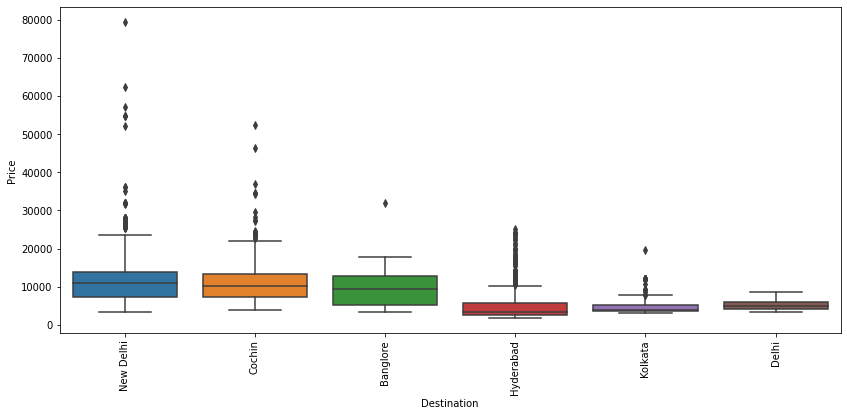

In [21]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=90)
sns.boxplot(y = "Price", x = "Destination", data = train_data.sort_values("Price", ascending = False))


In [22]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [23]:
train_data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [24]:
# It an label data so we perform label encoding here
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [25]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [26]:
trained_data = pd.concat([train_data,Airline,Source,Destination],axis=1)
trained_data.drop(['Airline','Source','Destination'],axis=1,inplace=True)
trained_data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
trained_data.shape

(10682, 30)

## Testing data

In [28]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [29]:
test_data.dropna(inplace=True)

test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

test_data['Dep_Hour'] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_Min'] = pd.to_datetime(test_data.Dep_Time).dt.minute

# for Arrival_Time
test_data['Arrival_Hour'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_Min'] = pd.to_datetime(test_data.Arrival_Time).dt.minute


duration = list(test_data.Duration)
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i] + ' 0m'
        else:
            duration[i] = '0h '+ duration[i]

# Extract hour and minute and create new column
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))
    
test_data["duration_hours"] = duration_hours
test_data["duration_mins"] = duration_mins

test_data.head()

Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline

Source = test_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source

Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination

test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

tested_data = pd.concat([test_data,Airline,Source,Destination],axis=1)
tested_data.drop(['Airline', 'Date_of_Journey', 'Source', 'Destination','Duration' ,'Route','Additional_Info','Dep_Time','Arrival_Time'],axis=1,inplace=True)

tested_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [30]:
len(trained_data.columns), len(tested_data.columns)

(30, 28)

## Feature Selection

In [31]:
X = trained_data.drop('Price',axis=1)

In [32]:
y = trained_data['Price']

In [33]:
X.shape , y.shape

((10682, 29), (10682,))

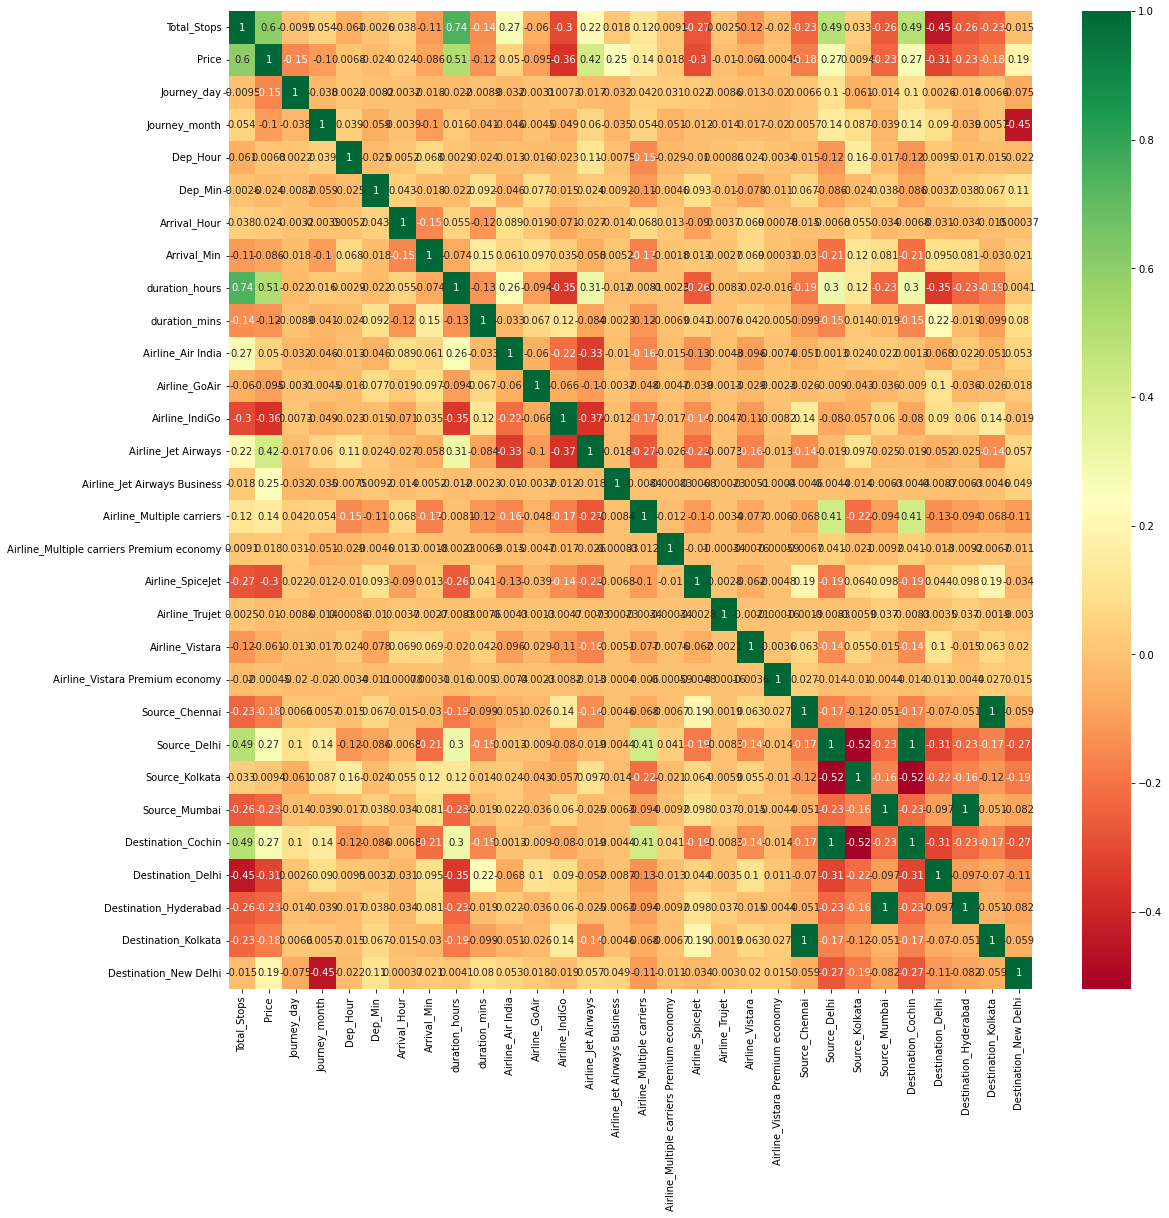

In [34]:
plt.figure(figsize = (18,18))
sns.heatmap(trained_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [35]:
# non of feature is highlt correlated so we are not going to remove any feature

In [36]:
from sklearn.feature_selection import mutual_info_classif

In [37]:
X

,Total_Stops,Journey_day,Journey_month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [38]:
FS = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
FS.columns=['Importance']
FS.sort_values(by='Importance',ascending=False)
FS

,Importance
Total_Stops,2.157949
Journey_day,0.811858
Journey_month,1.285016
Dep_Hour,1.443585
Dep_Min,1.226128
Arrival_Hour,1.846901
Arrival_Min,1.541697
duration_hours,1.767667
duration_mins,1.080491
Airline_Air India,0.763685


In [39]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [40]:
print(selection.feature_importances_)

[2.33929568e-01 1.43481627e-01 5.40868063e-02 2.39905169e-02
 2.05811708e-02 2.78654903e-02 1.91154611e-02 1.24542226e-01
 1.82957526e-02 9.37070784e-03 1.88546445e-03 1.78946617e-02
 1.34266221e-01 6.75701159e-02 1.82526251e-02 8.51950049e-04
 3.37617077e-03 1.36276537e-04 4.81361826e-03 8.51785942e-05
 5.30815348e-04 1.25534361e-02 3.16259989e-03 6.31192941e-03
 1.13272761e-02 1.00865945e-02 6.53637116e-03 4.40677358e-04
 2.46586911e-02]


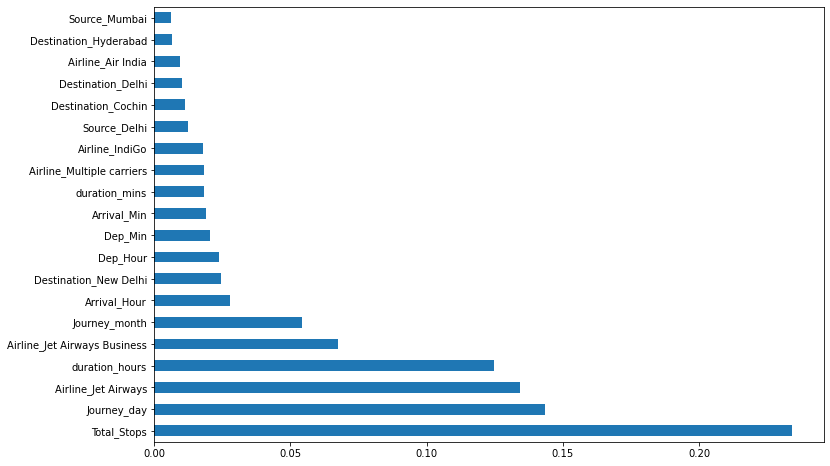

In [41]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Model Fitting

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
X_train.shape,y_train.shape

((8545, 29), (8545,))

In [44]:
X_test.shape,y_test.shape

((2137, 29), (2137,))

- ### Ramdom Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
y_pred = reg_rf.predict(X_test)

In [47]:
reg_rf.score(X_train, y_train)

0.953624352727178

In [48]:
reg_rf.score(X_test, y_test)

0.7963102517013175

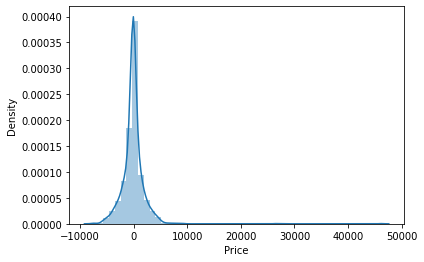

In [49]:
sns.distplot(y_test-y_pred)
plt.show()

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1179.2211371305473
MSE: 4391969.825470528
RMSE: 2095.7027044575116


In [51]:
metrics.r2_score(y_test, y_pred)

0.7963102517013175

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [54]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [55]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [56]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [58]:
prediction = rf_random.predict(X_test)

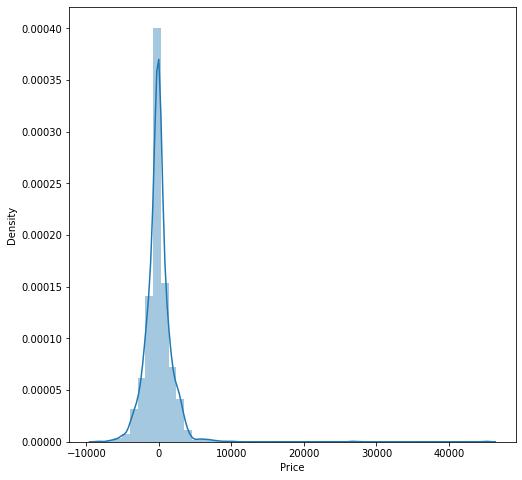

In [59]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

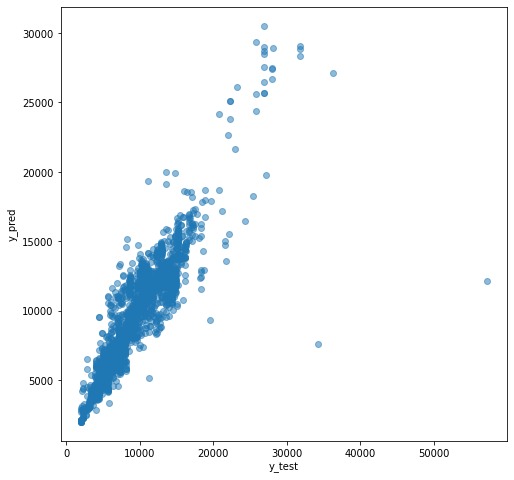

In [60]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1165.7959829992535
MSE: 4042441.9371483284
RMSE: 2010.5824870291515


## Save the model to reuse it again

In [62]:
for i in trained_data.columns:
    if i not in tested_data.columns:
        print(i)

Price
Airline_Trujet


In [63]:
(tested_data.shape)

(2671, 28)

In [64]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [65]:
df = tested_data.assign(profit=[0]*len(tested_data))
df.shape

(2671, 29)

In [73]:
import pickle
file = open('model.pkl', 'wb')
pickle.dump(reg_rf, file)

In [74]:
model = open('model.pkl','rb')
forest = pickle.load(model)

In [75]:
y_prediction = forest.predict(X_test)

In [76]:
metrics.r2_score(y_test, y_prediction)

0.7963102517013175

In [77]:
y_pred = forest.predict(df)
y_pred

array([13712.567     ,  4592.85      , 16459.27928571, ...,
       17751.93083333, 14008.98      ,  7582.86      ])

<h3 align='right'> Thank you